In [1]:
from util import gui_play

gui_play()

AttributeError: 'Mbtree_GUI' object has no attribute 'show_score'

In [2]:
from tree import Mbtree, Mbtree_GUI

mbtree = Mbtree.load("../data/aidata")
Mbtree_GUI(mbtree)

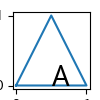

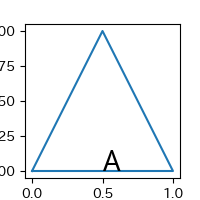

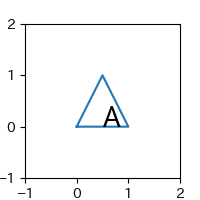

In [4]:
import matplotlib.pyplot as plt
import japanize_matplotlib

fig, ax = plt.subplots(figsize=(1, 1))
ax.plot([0, 1, 0.5, 0], [0, 0, 1, 0])
ax.text(0.5, 0, "A", fontsize=20)
plt.show()
fig, ax = plt.subplots(figsize=(2, 2))
ax.plot([0, 1, 0.5, 0], [0, 0, 1, 0])
ax.text(0.5, 0, "A", fontsize=20)
plt.show()
fig, ax = plt.subplots(figsize=(2, 2))
ax.set_xlim(-1, 2)
ax.set_ylim(-1, 2)
ax.plot([0, 1, 0.5, 0], [0, 0, 1, 0])
ax.text(0.5, 0, "A", fontsize=20)
plt.show()

In [5]:
Mbtree_GUI(mbtree, size=0.5)

In [6]:
from tree import Node, Rect
from marubatsu import Marubatsu_GUI

def draw_node(self, ax=None, maxdepth=None, emphasize=False, darkness=0, size=0.25, lw=0.8, dx=0, dy=0):  
    width = 8
    if ax is None:
        height = len(self.children) * 4
        fig, ax = plt.subplots(figsize=(width * size, height * size))
        ax.set_xlim(0, width)
        ax.set_ylim(0, height)   
        ax.invert_yaxis()
        ax.axis("off")
        for childnode in self.children:
            childnode.height = 4
        self.height = height         
        
    # 自分自身のノードを真ん中の位置になるように (dx, dy) からずらして描画する
    y = dy + (self.height - 3) / 2
    bc = "red" if emphasize else None
    Marubatsu_GUI.draw_board(ax, self.mb, show_result=True, 
                            score=getattr(self, "score", None), bc=bc, darkness=darkness, lw=lw, dx=dx, dy=y)
    if hasattr(self, "score"):
        ax.text(dx, y - 0.1, self.score, fontsize=70*size)
    rect = Rect(dx, y, 3, 3)
    # 子ノードが存在する場合に、エッジの線と子ノードを描画する
    if len(self.children) > 0:
        if maxdepth != self.depth:   
            ax.plot([dx + 3.5, dx + 4], [y + 1.5, y + 1.5], c="k", lw=lw)
            prevy = None
            for childnode in self.children:
                childnodey = dy + (childnode.height - 3) / 2
                if maxdepth is None:
                    Marubatsu_GUI.draw_board(ax, childnode.mb, show_result=True,
                                            score=getattr(childnode, "score", None), dx=dx+5, dy=childnodey, lw=lw)
                edgey = childnodey + 1.5
                ax.plot([dx + 4 , dx + 4.5], [edgey, edgey], c="k", lw=lw)
                if prevy is not None:
                    ax.plot([dx + 4 , dx + 4], [prevy, edgey], c="k", lw=lw)
                prevy = edgey
                dy += childnode.height
        else:
            ax.plot([dx + 3.5, dx + 4.5], [y + 1.5, y + 1.5], c="k", lw=lw)
            
    return rect

Node.draw_node = draw_node

In [7]:
Mbtree_GUI(mbtree)

In [8]:
Mbtree_GUI(mbtree, size=0.5)

In [9]:
def update_gui(self):
    self.ax.clear()
    self.ax.set_xlim(-1, self.width - 1)
    self.ax.set_ylim(-1, self.height - 1)   
    self.ax.invert_yaxis()
    self.ax.axis("off")   
    
    if self.selectednode.depth <= 4:
        maxdepth = self.selectednode.depth + 1
    elif self.selectednode.depth == 5:
        maxdepth = 7
    else:
        maxdepth = 9
    centernode = self.selectednode
    while centernode.depth > 6:
        centernode = centernode.parent
    self.mbtree.draw_subtree(centernode=centernode, selectednode=self.selectednode,
                     show_bestmove=True, ax=self.ax, maxdepth=maxdepth, size=self.size)
    
    disabled = self.selectednode.parent is None
    self.set_button_status(self.left_button, disabled=disabled)
    disabled = self.selectednode.depth >= 6 or len(self.selectednode.children) == 0
    self.set_button_status(self.right_button, disabled=disabled)
    disabled = self.selectednode.parent is None or self.selectednode.parent.children.index(self.selectednode) == 0
    self.set_button_status(self.up_button, disabled=disabled)
    disabled = self.selectednode.parent is None or self.selectednode.parent.children[-1] is self.selectednode
    self.set_button_status(self.down_button, disabled=disabled)

Mbtree_GUI.update_gui = update_gui

In [10]:
Mbtree_GUI(mbtree)

In [11]:
Mbtree_GUI(mbtree, size=0.5)

In [12]:
gui_play()

In [13]:
import ipywidgets as widgets

def create_widgets(self):
    self.output = widgets.Output()  
    self.print_helpmessage()
    self.output.layout.display = "none"
    self.left_button = self.create_button("←", 50)
    self.up_button = self.create_button("↑", 50)
    self.right_button = self.create_button("→", 50)
    self.down_button = self.create_button("↓", 50)
    self.size_slider = widgets.FloatSlider(min=0.05, max=0.25, step=0.01, 
                                           description="size", value=self.size)
    self.help_button = self.create_button("？", 50)
    self.label = widgets.Label(value="", layout=widgets.Layout(width=f"50px"))
    
    with plt.ioff():
        self.fig = plt.figure(figsize=[self.width * self.size,
                                        self.height * self.size])
        self.ax = self.fig.add_axes([0, 0, 1, 1])
    self.fig.canvas.toolbar_visible = False
    self.fig.canvas.header_visible = False
    self.fig.canvas.footer_visible = False
    self.fig.canvas.resizable = False
    
Mbtree_GUI.create_widgets = create_widgets 

In [14]:
def display_widgets(self):    
    hbox1 = widgets.HBox([self.label, self.up_button, self.label])
    hbox2 = widgets.HBox([self.left_button, self.label, self.right_button,
                          self.size_slider, self.help_button])
    hbox3 = widgets.HBox([self.label, self.down_button, self.label])
    self.vbox = widgets.VBox([self.output, hbox1, hbox2, hbox3, self.fig.canvas])
    display(self.vbox)  
    
Mbtree_GUI.display_widgets = display_widgets

In [15]:
Mbtree_GUI(mbtree)

In [16]:
def create_event_handler(self):
    def on_left_button_clicked(b=None):
        if self.selectednode.parent is not None:
            self.selectednode = self.selectednode.parent
            self.update_gui()
            
    def on_right_button_clicked(b=None):
        if len(self.selectednode.children) > 0:
            self.selectednode = self.selectednode.children[0]
            self.update_gui()

    def on_up_button_clicked(b=None):
        if self.selectednode.parent is not None:
            index = self.selectednode.parent.children.index(self.selectednode)
            if index > 0:
                self.selectednode = self.selectednode.parent.children[index - 1]
                self.update_gui()
            
    def on_down_button_clicked(b=None):
        if self.selectednode.parent is not None:
            index = self.selectednode.parent.children.index(self.selectednode)
            if self.selectednode.parent.children[-1] is not self.selectednode:
                self.selectednode = self.selectednode.parent.children[index + 1]
                self.update_gui()            
                
    def on_size_slider_changed(changed):
        self.size = changed["new"]
        self.fig.set_figwidth(self.width * self.size)
        self.fig.set_figheight(self.height * self.size)
        self.update_gui()
                
    def on_help_button_clicked(b=None):
        self.output.layout.display = "none" if self.output.layout.display is None else None
                        
    self.left_button.on_click(on_left_button_clicked)
    self.right_button.on_click(on_right_button_clicked)
    self.up_button.on_click(on_up_button_clicked)
    self.down_button.on_click(on_down_button_clicked)
    self.size_slider.observe(on_size_slider_changed, names="value")
    self.help_button.on_click(on_help_button_clicked)

    def on_key_press(event):
        keymap = {
            "left": on_left_button_clicked,
            "0": on_left_button_clicked,
            "right": on_right_button_clicked,
            "up": on_up_button_clicked,
            "down": on_down_button_clicked,
        }
        if event.key in keymap:
            keymap[event.key]()
        else:
            try:
                num = int(event.key) - 1
                x = num % 3
                y = 2 - (num // 3)
                move = (x, y)
                if move in self.selectednode.children_by_move:
                    self.selectednode = self.selectednode.children_by_move[move]
                    self.update_gui()
            except:
                pass            
            
    def on_mouse_down(event):
        for rect, node in self.mbtree.nodes_by_rect.items():
            if rect.is_inside(event.xdata, event.ydata):
                self.selectednode = node
                self.update_gui()
                break               
            
    # fig の画像イベントハンドラを結び付ける
    self.fig.canvas.mpl_connect("key_press_event", on_key_press)
    self.fig.canvas.mpl_connect("button_press_event", on_mouse_down)
    
Mbtree_GUI.create_event_handler = create_event_handler

In [17]:
Mbtree_GUI(mbtree)

In [30]:
import matplotlib.patches as patches

def draw_node(self, ax=None, maxdepth=None, emphasize=False, darkness=0, show_score=True, size=0.25, lw=0.8, dx=0, dy=0):
    width = 8
    if ax is None:
        height = len(self.children) * 4
        fig, ax = plt.subplots(figsize=(width * size, height * size))
        ax.set_xlim(0, width)
        ax.set_ylim(0, height)   
        ax.invert_yaxis()
        ax.axis("off")
        for childnode in self.children:
            childnode.height = 4
        self.height = height         
        
    # 自分自身のノードを真ん中の位置になるように (dx, dy) からずらして描画する
    y = dy + (self.height - 3) / 2
    bc = "red" if emphasize else None
    Marubatsu_GUI.draw_board(ax, self.mb, show_result=True, 
                            score=getattr(self, "score", None), bc=bc, darkness=darkness, lw=lw, dx=dx, dy=y)
    if hasattr(self, "score") and show_score:
        ax.text(dx, y - 0.1, self.score, fontsize=70*size)
    rect = Rect(dx, y, 3, 3)
    # 子ノードが存在する場合に、エッジの線と子ノードを描画する
    if len(self.children) > 0:
        if maxdepth != self.depth:   
            ax.plot([dx + 3.5, dx + 4], [y + 1.5, y + 1.5], c="k", lw=lw)
            prevy = None
            for childnode in self.children:
                childnodey = dy + (childnode.height - 3) / 2
                if maxdepth is None:
                    Marubatsu_GUI.draw_board(ax, childnode.mb, show_result=True,
                                            score=getattr(childnode, "score", None), dx=dx+5, dy=childnodey, lw=lw)
                edgey = childnodey + 1.5
                ax.plot([dx + 4 , dx + 4.5], [edgey, edgey], c="k", lw=lw)
                if prevy is not None:
                    ax.plot([dx + 4 , dx + 4], [prevy, edgey], c="k", lw=lw)
                prevy = edgey
                dy += childnode.height
        else:
            ax.plot([dx + 3.5, dx + 4.5], [y + 1.5, y + 1.5], c="k", lw=lw)
            
    return rect

Node.draw_node = draw_node

In [31]:
def draw_subtree(self, centernode=None, selectednode=None, ax=None, anim_frame=None, isscore=False,
                 show_bestmove=False, show_score=True, size=0.25, lw=0.8, maxdepth=2):
    def calc_darkness(node):
        """ノードを表示する暗さを計算して返す."""
        
        if show_bestmove:
            if node.parent is None:
                return 0
            elif node.mb.last_move in node.parent.bestmoves:
                return 0
            else:
                return 0.2
            
        if anim_frame is None:
            return 0
        index = node.score_index if isscore else node.id
        return 0.5 if index > anim_frame else 0
    
    self.nodes_by_rect = {}

    if centernode is None:
        centernode = self.root
    self.calc_node_height(N=centernode, maxdepth=maxdepth)
    width = 5 * (maxdepth + 1)
    height = centernode.height
    parent = centernode.parent
    if parent is not None:
        height += (len(parent.children) - 1) * 4
        parent.height = height
    if ax is None:
        fig, ax = plt.subplots(figsize=(width * size, height * size))
        ax.set_xlim(0, width)
        ax.set_ylim(0, height)   
        ax.invert_yaxis()
        ax.axis("off")        
    
    if show_bestmove:
        bestx = 5 * maxdepth + 4
        bestwidth = 50 - bestx
        ax.add_artist(patches.Rectangle(xy=(bestx, -1), width=bestwidth,
                                        height=height + 1, fc="lightgray"))
    
    nodelist = [centernode]
    depth = centernode.depth
    while len(nodelist) > 0 and depth <= maxdepth:        
        dy = 0
        if parent is not None:
            dy = parent.children.index(centernode) * 4
        childnodelist = []
        for node in nodelist:
            if node is None:
                dy += 4
                childnodelist.append(None)
            else:
                dx = 5 * node.depth
                emphasize = node is selectednode
                darkness = calc_darkness(node)
                rect = node.draw_node(ax=ax, maxdepth=maxdepth, emphasize=emphasize, darkness=darkness,
                                      show_score=show_score, size=size, lw=lw, dx=dx, dy=dy)
                self.nodes_by_rect[rect] = node
                if show_bestmove and depth == maxdepth:
                    bestnode = node
                    while len(bestnode.bestmoves) > 0:
                        bestmove = bestnode.bestmoves[0]
                        bestnode = bestnode.children_by_move[bestmove]
                        dx = 5 * bestnode.depth
                        bestnode.height = 4
                        rect = bestnode.draw_node(ax=ax, maxdepth=bestnode.depth, emphasize=emphasize,
                                                  show_score=show_score, size=size, lw=lw, dx=dx, dy=dy)
                        self.nodes_by_rect[rect] = bestnode                                          
                    
                dy += node.height
                if len(node.children) > 0:  
                    childnodelist += node.children
                else:
                    childnodelist.append(None)
        depth += 1
        nodelist = childnodelist
        
    if parent is not None:
        dy = 0
        for sibling in parent.children:
            if sibling is not centernode:
                sibling.height = 4
                dx = 5 * sibling.depth
                darkness = calc_darkness(sibling)
                rect = sibling.draw_node(ax, maxdepth=sibling.depth, size=size, darkness=darkness,
                                         show_score=show_score, lw=lw, dx=dx, dy=dy)
                self.nodes_by_rect[rect] = sibling
            dy += sibling.height
        dx = 5 * parent.depth
        darkness = calc_darkness(parent)
        rect = parent.draw_node(ax, maxdepth=maxdepth, darkness=darkness, 
                                show_score=show_score, size=size, lw=lw, dx=dx, dy=0)
        self.nodes_by_rect[rect] = parent
    
        node = parent
        while node.parent is not None:
            node = node.parent
            node.height = height
            dx = 5 * node.depth
            darkness = calc_darkness(node)
            rect = node.draw_node(ax, maxdepth=node.depth, darkness=darkness,
                                  show_score=show_score, size=size, lw=lw, dx=dx, dy=0)
            self.nodes_by_rect[rect] = node
            
Mbtree.draw_subtree = draw_subtree

In [32]:
def __init__(self, mbtree, show_score=True, size=0.15):
    self.mbtree = mbtree
    self.show_score = show_score
    self.size = size
    self.width = 50
    self.height = 65
    self.selectednode = self.mbtree.root
    super(Mbtree_GUI, self).__init__()
    
Mbtree_GUI.__init__ = __init__

In [33]:
def update_gui(self):
    self.ax.clear()
    self.ax.set_xlim(-1, self.width - 1)
    self.ax.set_ylim(-1, self.height - 1)   
    self.ax.invert_yaxis()
    self.ax.axis("off")   
    
    if self.selectednode.depth <= 4:
        maxdepth = self.selectednode.depth + 1
    elif self.selectednode.depth == 5:
        maxdepth = 7
    else:
        maxdepth = 9
    centernode = self.selectednode
    while centernode.depth > 6:
        centernode = centernode.parent
    self.mbtree.draw_subtree(centernode=centernode, selectednode=self.selectednode,
                             show_bestmove=True, show_score=self.show_score,
                             ax=self.ax, maxdepth=maxdepth, size=self.size)
    
    disabled = self.selectednode.parent is None
    self.set_button_status(self.left_button, disabled=disabled)
    disabled = self.selectednode.depth >= 6 or len(self.selectednode.children) == 0
    self.set_button_status(self.right_button, disabled=disabled)
    disabled = self.selectednode.parent is None or self.selectednode.parent.children.index(self.selectednode) == 0
    self.set_button_status(self.up_button, disabled=disabled)
    disabled = self.selectednode.parent is None or self.selectednode.parent.children[-1] is self.selectednode
    self.set_button_status(self.down_button, disabled=disabled)

Mbtree_GUI.update_gui = update_gui

In [34]:
Mbtree_GUI(mbtree)

In [35]:
Mbtree_GUI(mbtree, show_score=False)

In [36]:
def create_widgets(self):
    self.output = widgets.Output()  
    self.print_helpmessage()
    self.output.layout.display = "none"
    self.left_button = self.create_button("←", 50)
    self.up_button = self.create_button("↑", 50)
    self.right_button = self.create_button("→", 50)
    self.down_button = self.create_button("↓", 50)
    self.score_button = self.create_button("評価値の表示", 100)
    self.size_slider = widgets.FloatSlider(min=0.05, max=0.25, step=0.01, description="size", value=self.size)
    self.help_button = self.create_button("？", 50)
    self.label = widgets.Label(value="", layout=widgets.Layout(width=f"50px"))
    
    with plt.ioff():
        self.fig = plt.figure(figsize=[self.width * self.size,
                                        self.height * self.size])
        self.ax = self.fig.add_axes([0, 0, 1, 1])
    self.fig.canvas.toolbar_visible = False
    self.fig.canvas.header_visible = False
    self.fig.canvas.footer_visible = False
    self.fig.canvas.resizable = False
    
Mbtree_GUI.create_widgets = create_widgets 

In [37]:
def display_widgets(self):    
    hbox1 = widgets.HBox([self.label, self.up_button, self.label, self.label, self.score_button])
    hbox2 = widgets.HBox([self.left_button, self.label, self.right_button,
                          self.size_slider, self.help_button])
    hbox3 = widgets.HBox([self.label, self.down_button, self.label])
    self.vbox = widgets.VBox([self.output, hbox1, hbox2, hbox3, self.fig.canvas])
    display(self.vbox)  
    
Mbtree_GUI.display_widgets = display_widgets

In [39]:
Mbtree_GUI(mbtree)

In [40]:
def create_event_handler(self):
    def on_left_button_clicked(b=None):
        if self.selectednode.parent is not None:
            self.selectednode = self.selectednode.parent
            self.update_gui()
            
    def on_right_button_clicked(b=None):
        if len(self.selectednode.children) > 0:
            self.selectednode = self.selectednode.children[0]
            self.update_gui()

    def on_up_button_clicked(b=None):
        if self.selectednode.parent is not None:
            index = self.selectednode.parent.children.index(self.selectednode)
            if index > 0:
                self.selectednode = self.selectednode.parent.children[index - 1]
                self.update_gui()
            
    def on_down_button_clicked(b=None):
        if self.selectednode.parent is not None:
            index = self.selectednode.parent.children.index(self.selectednode)
            if self.selectednode.parent.children[-1] is not self.selectednode:
                self.selectednode = self.selectednode.parent.children[index + 1]
                self.update_gui()            
                
    def on_score_button_clicked(b=None):
        self.show_score = not self.show_score
        self.update_gui()
                
    def on_size_slider_changed(changed):
        self.size = changed["new"]
        self.fig.set_figwidth(self.width * self.size)
        self.fig.set_figheight(self.height * self.size)
        self.update_gui()
                
    def on_help_button_clicked(b=None):
        self.output.layout.display = "none" if self.output.layout.display is None else None
                        
    self.left_button.on_click(on_left_button_clicked)
    self.right_button.on_click(on_right_button_clicked)
    self.up_button.on_click(on_up_button_clicked)
    self.down_button.on_click(on_down_button_clicked)
    self.score_button.on_click(on_score_button_clicked)
    self.size_slider.observe(on_size_slider_changed, names="value")
    self.help_button.on_click(on_help_button_clicked)

    def on_key_press(event):
        keymap = {
            "left": on_left_button_clicked,
            "0": on_left_button_clicked,
            "right": on_right_button_clicked,
            "up": on_up_button_clicked,
            "down": on_down_button_clicked,
        }
        if event.key in keymap:
            keymap[event.key]()
        else:
            try:
                num = int(event.key) - 1
                x = num % 3
                y = 2 - (num // 3)
                move = (x, y)
                if move in self.selectednode.children_by_move:
                    self.selectednode = self.selectednode.children_by_move[move]
                    self.update_gui()
            except:
                pass            
            
    def on_mouse_down(event):
        for rect, node in self.mbtree.nodes_by_rect.items():
            if rect.is_inside(event.xdata, event.ydata):
                self.selectednode = node
                self.update_gui()
                break               
            
    # fig の画像イベントハンドラを結び付ける
    self.fig.canvas.mpl_connect("key_press_event", on_key_press)
    self.fig.canvas.mpl_connect("button_press_event", on_mouse_down)
    
Mbtree_GUI.create_event_handler = create_event_handler

In [41]:
Mbtree_GUI(mbtree)

In [42]:
from gui import GUI

@staticmethod
def set_button_color(button, value):      
    button.style.button_color = "lightgreen" if value else "darkgray"
        
GUI.set_button_color = set_button_color   

In [43]:
def update_gui(self):
    self.ax.clear()
    self.ax.set_xlim(-1, self.width - 1)
    self.ax.set_ylim(-1, self.height - 1)   
    self.ax.invert_yaxis()
    self.ax.axis("off")   
    
    if self.selectednode.depth <= 4:
        maxdepth = self.selectednode.depth + 1
    elif self.selectednode.depth == 5:
        maxdepth = 7
    else:
        maxdepth = 9
    centernode = self.selectednode
    while centernode.depth > 6:
        centernode = centernode.parent
    self.mbtree.draw_subtree(centernode=centernode, selectednode=self.selectednode,
                             show_bestmove=True, show_score=self.show_score,
                             ax=self.ax, maxdepth=maxdepth, size=self.size)
    
    disabled = self.selectednode.parent is None
    self.set_button_status(self.left_button, disabled=disabled)
    disabled = self.selectednode.depth >= 6 or len(self.selectednode.children) == 0
    self.set_button_status(self.right_button, disabled=disabled)
    disabled = self.selectednode.parent is None or self.selectednode.parent.children.index(self.selectednode) == 0
    self.set_button_status(self.up_button, disabled=disabled)
    disabled = self.selectednode.parent is None or self.selectednode.parent.children[-1] is self.selectednode
    self.set_button_status(self.down_button, disabled=disabled)
    self.set_button_color(self.score_button, value=self.show_score)

Mbtree_GUI.update_gui = update_gui

In [44]:
def create_event_handler(self):
    def on_left_button_clicked(b=None):
        if self.selectednode.parent is not None:
            self.selectednode = self.selectednode.parent
            self.update_gui()
            
    def on_right_button_clicked(b=None):
        if len(self.selectednode.children) > 0:
            self.selectednode = self.selectednode.children[0]
            self.update_gui()

    def on_up_button_clicked(b=None):
        if self.selectednode.parent is not None:
            index = self.selectednode.parent.children.index(self.selectednode)
            if index > 0:
                self.selectednode = self.selectednode.parent.children[index - 1]
                self.update_gui()
            
    def on_down_button_clicked(b=None):
        if self.selectednode.parent is not None:
            index = self.selectednode.parent.children.index(self.selectednode)
            if self.selectednode.parent.children[-1] is not self.selectednode:
                self.selectednode = self.selectednode.parent.children[index + 1]
                self.update_gui()            
                
    def on_score_button_clicked(b=None):
        self.show_score = not self.show_score
        self.update_gui()
                
    def on_size_slider_changed(changed):
        self.size = changed["new"]
        self.fig.set_figwidth(self.width * self.size)
        self.fig.set_figheight(self.height * self.size)
        self.update_gui()
                
    def on_help_button_clicked(b=None):
        self.output.layout.display = "none" if self.output.layout.display is None else None
        self.update_gui()
                        
    self.left_button.on_click(on_left_button_clicked)
    self.right_button.on_click(on_right_button_clicked)
    self.up_button.on_click(on_up_button_clicked)
    self.down_button.on_click(on_down_button_clicked)
    self.score_button.on_click(on_score_button_clicked)
    self.size_slider.observe(on_size_slider_changed, names="value")
    self.help_button.on_click(on_help_button_clicked)

    def on_key_press(event):
        keymap = {
            "left": on_left_button_clicked,
            "0": on_left_button_clicked,
            "right": on_right_button_clicked,
            "up": on_up_button_clicked,
            "down": on_down_button_clicked,
        }
        if event.key in keymap:
            keymap[event.key]()
        else:
            try:
                num = int(event.key) - 1
                x = num % 3
                y = 2 - (num // 3)
                move = (x, y)
                if move in self.selectednode.children_by_move:
                    self.selectednode = self.selectednode.children_by_move[move]
                    self.update_gui()
            except:
                pass            
            
    def on_mouse_down(event):
        for rect, node in self.mbtree.nodes_by_rect.items():
            if rect.is_inside(event.xdata, event.ydata):
                self.selectednode = node
                self.update_gui()
                break               
            
    # fig の画像イベントハンドラを結び付ける
    self.fig.canvas.mpl_connect("key_press_event", on_key_press)
    self.fig.canvas.mpl_connect("button_press_event", on_mouse_down)
    
Mbtree_GUI.create_event_handler = create_event_handler

In [46]:
Mbtree_GUI(mbtree)

In [47]:
gui_play()

In [48]:
tb = widgets.ToggleButton(description="評価値の表示")
display(tb)

ToggleButton(value=False, description='評価値の表示')

In [49]:
tb = widgets.ToggleButton(description="評価値の表示", button_style="success")
display(tb)

ToggleButton(value=False, button_style='success', description='評価値の表示')